## object detector which identifies the classes of objects

### Importing Libraries

In [36]:
import cv2
# OpenCV: Library of programming functions mainly aimed at real time computer vision

import matplotlib.pyplot as plt

In [37]:
# Importing the configuration files and graph of the frozen inference
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"

# frozen_model: Graph of the deep learning architecture

### Training Model

In [38]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

# Using the dnn detection model

In [39]:
classlabels = []
file_name = "labels.txt"
with open(file_name, "rt") as file:
    classlabels = file.read().rstrip("\n").split("\n")

In [40]:
print(classlabels)

# the list of classes that the model can recognise

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'flower', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [41]:
print(len(classlabels))

80


In [42]:
# Setting the model configurations

model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)
# InputSwapRB automatically converts an image from the BGR to RGB format

<dnn_Model 0x7fc599b92570>

### Reading an image

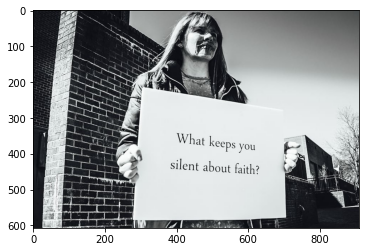

In [43]:
img = plt.imread("img3.jpg")
plt.imshow(img)

# loading the image. The image is in RGB format

In [44]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold = 0.55)

In [45]:
print(ClassIndex)

[[1]]


In [46]:
font_scale = 3  
font = cv2.FONT_HERSHEY_COMPLEX  # setting the font


# Iterating over the three arrays: ClassIndex, confidence, bbox
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)      # To draw the rectangles around the objects
    cv2.putText(img, classlabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color = (0, 0, 255), thickness = 3)
    # To write the names of the classes

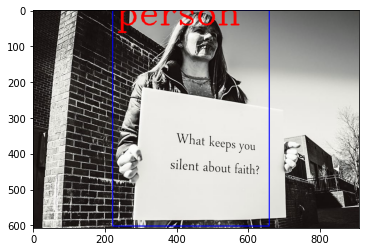

In [47]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# To print the image containing the class labels

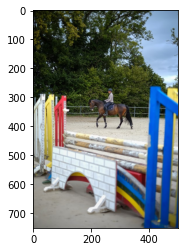

In [55]:
img = plt.imread("sample1.jpeg")
plt.imshow(img)

# loading the image. The image is in RGB format

In [56]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold = 0.55)

In [57]:
print(ClassIndex)

[[19]
 [ 1]]


In [58]:
font_scale = 3  
font = cv2.FONT_HERSHEY_COMPLEX  # setting the font


# Iterating over the three arrays: ClassIndex, confidence, bbox
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)      # To draw the rectangles around the objects
    cv2.putText(img, classlabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color = (0, 0, 255), thickness = 3)
    # To write the names of the classes

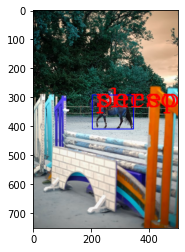

In [59]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# To print the image containing the class labels